In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from __future__ import print_function
import torch
from torchvision import transforms as T
from torchvision import models

In [3]:
pad_ufes_set1 = 'C:/Users/bolub/OneDrive/Masaüstü/Ders/Year_4/FYP/pad-ufes-20/images/imgs_part_1/imgs_part_1'
path_jpg = 'C:/Users/bolub/OneDrive/Masaüstü/Ders/Year_4/FYP/pad-ufes-20/images/imgs_part_1/imgs_part_1_process'

for x in os.listdir(pad_ufes_set1):
    if x.endswith('png'):
        img = Image.open(pad_ufes_set1 + '/' + x)
        img = img.convert('RGB')
        img.save(path_jpg + '/' + x + '.jpg')
        
    
#print(img_files)
    

In [4]:
path_jpg = 'C:/Users/bolub/OneDrive/Masaüstü/Ders/Year_4/FYP/pad-ufes-20/images/imgs_part_1/imgs_part_1_process'
img_files = [x for x in os.listdir(path_jpg)]
print(img_files[0])

PAT_100_393_595.png.jpg


PAT_100_393_595.png.jpg
PAT_100_393_898.png.jpg
PAT_101_1041_651.png.jpg
PAT_101_1041_658.png.jpg
PAT_101_1041_898.png.jpg
PAT_104_1754_276.png.jpg
PAT_104_1755_320.png.jpg
PAT_104_1756_151.png.jpg
PAT_106_158_249.png.jpg
PAT_106_158_270.png.jpg
PAT_106_159_325.png.jpg
PAT_107_160_609.png.jpg
PAT_108_161_423.png.jpg
PAT_108_161_575.png.jpg
PAT_108_161_878.png.jpg
PAT_108_162_526.png.jpg
PAT_108_162_660.png.jpg
PAT_108_424_944.png.jpg
PAT_109_868_113.png.jpg
PAT_109_868_723.png.jpg


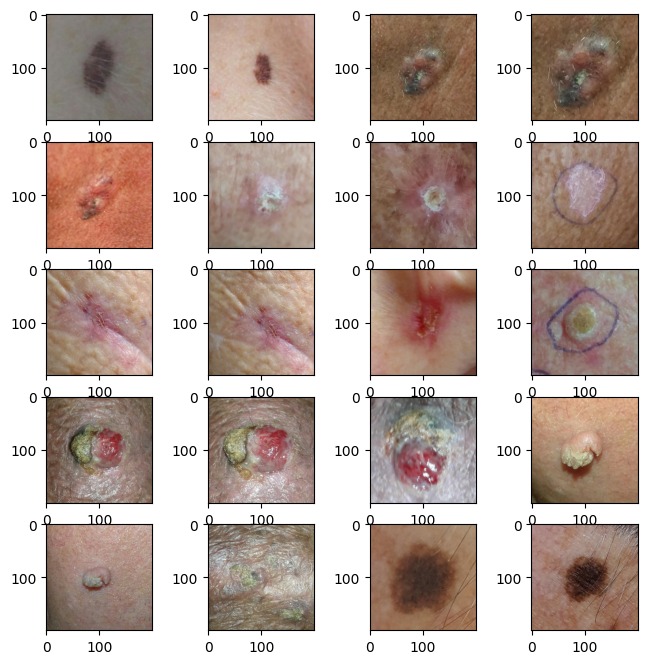

In [3]:
#Display the loaded images in a 5x4 grid
#dims_img_i = []
path_jpg = 'C:/Users/bolub/OneDrive/Masaüstü/Ders/Year_4/FYP/pad-ufes-20/images/imgs_part_1/imgs_part_1_process'

fig = plt.figure(figsize=(8,8))
cols = 4
rows = 5

img_files = [x for x in os.listdir(path_jpg)]

for i in range(0, cols*rows):
    img = cv.imread('pad-ufes-20/images/imgs_part_1/imgs_part_1_process/' + img_files[i])
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img)
    print(img_files[i])

plt.show()

     

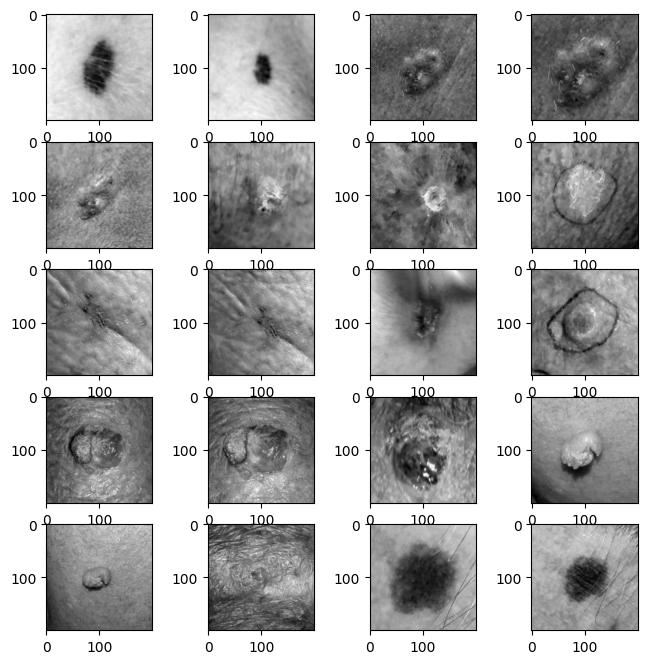

In [4]:
#Add the Gaussian blur and then view in 5x4 grid

figure2 = plt.figure(figsize=(8,8))
cols = 4
rows = 5

for i in range(0, cols*rows):
    img = cv.imread('pad-ufes-20/images/imgs_part_1/imgs_part_1_process/' + img_files[i])
    img = cv.GaussianBlur(img, (9,9), 0)
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    
    
    figure2.add_subplot(rows, cols, i+1)
    plt.imshow(img,cmap='gray' )

plt.show()

PAT_100_393_595.png.jpg
PAT_104_1754_276.png.jpg
PAT_309_662_76.png.jpg
PAT_202_917_942.png.jpg
PAT_345_719_815.png.jpg
PAT_126_191_304.png.jpg
PAT_201_306_781.png.jpg
PAT_154_235_162.png.jpg
PAT_233_354_828.png.jpg
PAT_237_363_344.png.jpg
PAT_106_158_249.png.jpg
PAT_159_246_630.png.jpg
PAT_338_710_93.png.jpg
PAT_325_689_528.png.jpg
PAT_15_23_240.png.jpg
PAT_147_219_206.png.jpg
PAT_305_655_30.png.jpg
PAT_75_113_647.png.jpg
PAT_115_175_206.png.jpg
PAT_108_424_944.png.jpg


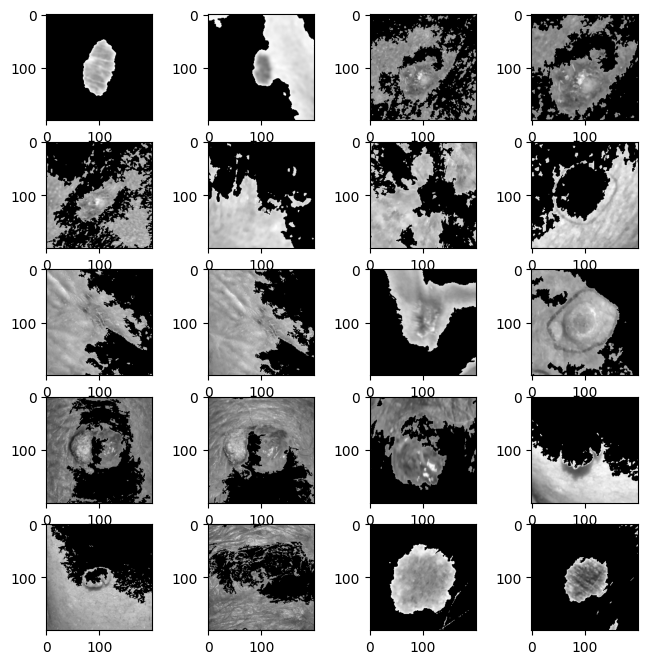

In [32]:
figure3 = plt.figure(figsize=(8,8))
cols = 4
rows = 5

subplot_num = 1  # initialize subplot number

for i in range(0, min(cols*rows, len(img_files))):
    img = cv.imread('pad-ufes-20/images/imgs_part_1/imgs_part_1_process/' + img_files[i])
    img = cv.GaussianBlur(img, (13,13), 0)
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #Otsu Thresholding
    ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    #Find Contours
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    #Masking
    mask = np.zeros(img.shape, np.uint8)
    for i in range(len(contours)):
        cv.drawContours(mask, contours, i, (255, 255, 255), -1)
        
    #Apply the mask
    result = cv.bitwise_and(img, img, mask=mask)

    
    figure3.add_subplot(rows, cols, subplot_num)  # use the new variable here
    plt.imshow(result, cmap='gray')
    print(img_files[i])
    
    subplot_num += 1  # increment subplot number

plt.show()


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 (array([[[105, 157]]], dtype=int32),
  array([[[128, 111]],
  
         [[129, 111]]], dtype=int32),
  array([[[107,  49]],
  
         [[106,  50]],
  
         [[105,  50]],
  
         [[103,  52]],
  
         [[101,  52]],
  
         [[100,  53]],
  
         [[ 98,  53]],
  
         [[ 97,  54]],
  
         [[ 96,  54]],
  
         [[ 96,  55]],
  
         [[ 95,  56]],
  
         [[ 95,  57]],
  
         [[ 93,  59]],
  
         [[ 92,  59]],
  
         [[ 91,  60]],
  
         [[ 90,  60]],
  
         [[ 89,  61]],
  
         [[ 89,  62]],
  
         [[ 90,  63]],
  
         [[ 87,  66]],
  
         [[ 87,  67]],
  
         [[ 86,  68]],
  
         [[ 86,  69]],
  
         [[ 85,  70]],
  
         [[ 85,  71]],
  
         [[ 84,  72]],

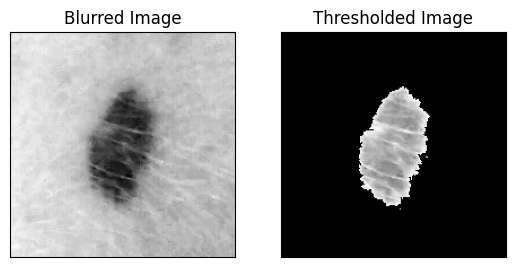

In [44]:
def preProcess(image):
    
    img = cv.imread(image)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #img = cv.GaussianBlur(img, (9,9), 0)
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    
    _, threshold = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    #print(threshold)
    #Find Contours
    contours, _ = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    #print(type(contours))
    mask = np.zeros(img.shape, np.uint8)
    for i in range(len(contours)):
        cv.drawContours(mask, contours, i, (255, 255, 255), -1)
    
    result = cv.bitwise_and(img, img, mask=mask)
    
    plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
    plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2), plt.imshow(result, cmap='gray')
    plt.title('Thresholded Image'), plt.xticks([]), plt.yticks([])
    
    return result, contours

image_path = 'pad-ufes-20/images/imgs_part_1/imgs_part_1_process/' + img_files[0]

preProcess(image_path)

((array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], dtype=int32),), array([[[-1, -1, -1, -1]]], dtype=int32))


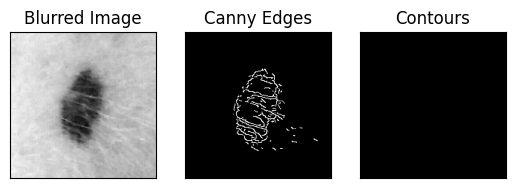

In [133]:
def CannyDetect(image_path):
    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (200,200))
    
    edges = cv.Canny(img, 500, 600, apertureSize=5)
    _, threshold = cv.threshold(edges, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    contours = cv.findContours(threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    print(contours)
    contours = contours[0] if len(contours) == 2 else contours[1]
    
    max_contour = max(contours, key=cv.contourArea)
    
    result = np.zeros_like(img)
    cv.drawContours(result, [max_contour], 0, (255,255,255), cv.FILLED)
    
    plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
    plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,2), plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3), plt.imshow(result, cmap='gray')
    plt.title('Contours'), plt.xticks([]), plt.yticks([])
    

image_path1 = 'pad-ufes-20/images/imgs_part_1/imgs_part_1_process/' + img_files[0]

CannyDetect(image_path)    
    

In [75]:
fcn = models.segmentation.fcn_resnet101(weights = True).eval()

c:\Users\bolub\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


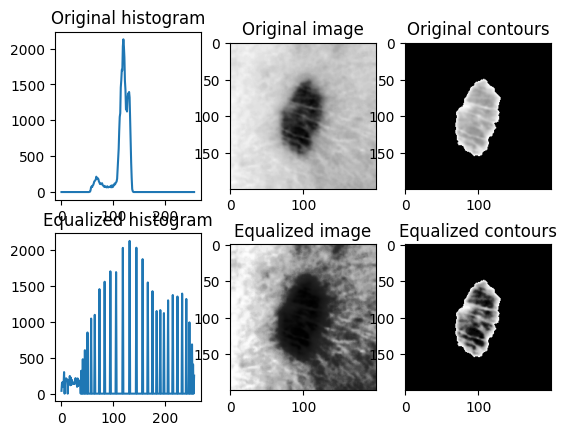

In [134]:
#Histogram calculation

fig4, axes = plt.subplots(nrows=2,ncols=3)

# Load the image
img = cv.imread('pad-ufes-20/images/imgs_part_1/imgs_part_1_process/' + img_files[0])

img = cv.GaussianBlur(img, (13,13), 0)
img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Calculate the histogram
hist = cv.calcHist([img], [0], None, [256], [0, 256])
img_eq = cv.equalizeHist(img)
hist_eq = cv.calcHist([img_eq], [0], None, [256], [0, 256])

# Do the thresholding for both
ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
ret_eq, thresh_eq = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
#Find Contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_eq, hierarchy_eq = cv.findContours(thresh_eq, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#Masking
mask = np.zeros(img.shape, np.uint8)
for i in range(len(contours)):
    cv.drawContours(mask, contours, i, (255, 255, 255), -1)
for j in range(len(contours_eq)):
    cv.drawContours(mask, contours_eq, i, (255, 255, 255), -1)        
#Apply the mask
result = cv.bitwise_and(img, img, mask=mask)
result_eq = cv.bitwise_and(img_eq, img_eq, mask=mask)


# Plot the histogram and threshold values

axes[0,0].plot(hist)
axes[0,0].set_title('Original histogram')
axes[0,1].imshow(img, cmap='gray')
axes[0,1].set_title('Original image')
axes[0,2].imshow(result, cmap='gray')
axes[0,2].set_title('Original contours')
axes[1,0].plot(hist_eq)
axes[1,0].set_title('Equalized histogram')
axes[1,1].imshow(img_eq, cmap='gray')
axes[1,1].set_title('Equalized image')
axes[1,2].imshow(result_eq, cmap='gray')
axes[1,2].set_title('Equalized contours')

# Show the plot
plt.show()


In [27]:
def drawMinAreaRect(image):
    
    img = cv.imread(image)
    img = cv.GaussianBlur(img, (5,5),0)
    img = cv.resize(img, (200, 200))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    #Threshold via Otsu's method
    _ , thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    
    #Get the contours for the image
    contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    #draw minimum area rectangle around the contour
    rect = cv.minAreaRect(contours[0])
    
    for i in contours[1:0]:
        
        rect_iter = cv.minAreaRect(i)
        
        if rect_iter[1][0] * rect_iter[1][1] > rect[1][0] * rect[1][1]:
            rect = rect_iter
    
    
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cv.drawContours(img, [box], 0, (0,255,0), 2)
    
    cv.imshow('Minimum Area Rectangles', img)
    cv.waitKey(0)
    cv.destroyAllWindows()


input_var = 'pad-ufes-20/images/imgs_part_1/imgs_part_1_process/' + img_files[0]
  
drawMinAreaRect(input_var)

C:\Users\bolub\AppData\Local\Temp\ipykernel_4504\1135683072.py:26: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


C:\Users\bolub\AppData\Local\Temp\ipykernel_30264\1391150099.py:24: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


((98.62872314453125, 100.78713989257812), (59.050724029541016, 103.46115112304688), 20.85445785522461)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


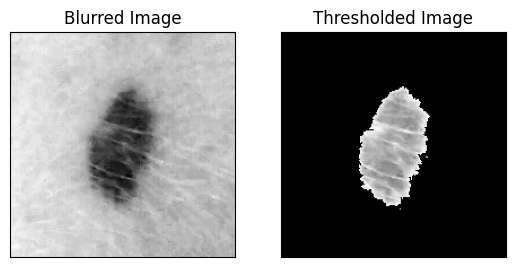

In [42]:
def drawMinAreaRect(image, contours):
    
    #draw minimum area rectangle around the contour
    rect = cv.minAreaRect(contours[0])
    
    for i in contours[1:-1]:
        
        rect_iter = cv.minAreaRect(i)
        
        if rect_iter[1][0] * rect_iter[1][1] > rect[1][0] * rect[1][1]:
            rect = rect_iter
    
    angle_rect = rect[2]
    actual_angle = 0
    
    #Check if the rectangle angle is lower than -45
    if abs(angle_rect) <= 45:
        actual_angle = abs(angle_rect)
    else:
        actual_angle = 90 - abs(angle_rect)
    
    #Define the four corners of the rectangle
    box = cv.boxPoints(rect)
    box = np.int0(box)
    print(rect)
    
    #Get the center of the bounding rectangle for rotation matrix
    height = round(int(rect[0][1]))
    width = round(int(rect[0][0]))
    x_img, y_img = image.shape[:2]
    
    #Define the rotation matrix and necessary offsets
    M = cv.getRotationMatrix2D((width, height), actual_angle, 1)
    off_x = x_img - width
    off_y = y_img - height
    M2 = np.float64([[1, 0, off_x],[0,1,off_y]])
    
    #Apply the rotation matrix to the image and the rectangle
    img_rot = cv.warpAffine(image, M, (x_img, y_img))
    #img_rot = cv.warpAffine(img_rot,M2,(x_img, y_img))
    box_rot = cv.transform(np.array([box]), M)
    #box_rot = cv.transform(box_rot,M2)
    
    #Find the center of the rectgangle
    #cen_rect_x = 
    img_rot = cv.cvtColor(img_rot,cv.COLOR_GRAY2RGB)
    #cv.drawContours(img_rot, [box_rot], 0, color=(0,255,0), thickness=1)
    
    cv.imshow('Minimum Area Rectangles', img_rot)
    cv.waitKey(0)
    cv.destroyAllWindows()
    print(img_rot)
    return img_rot


input_var = 'pad-ufes-20/images/imgs_part_1/imgs_part_1_process/' + img_files[0]

result, contours = preProcess(input_var)    
rot_img = drawMinAreaRect(result, contours)

In [41]:
#Find Asymmetry

def find_asymmetry(rotated_image):
    gray_rotated_image = cv.cvtColor(rotated_image, cv.COLOR_RGB2GRAY)
    _ , thresh = cv.threshold(gray_rotated_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    
    # Get the image dimensions
    height, width = gray_rotated_image.shape

    # Fold the image along the vertical axis
    left_half = thresh[:, :width // 2]
    right_half = np.flip(thresh[:, width // 2:], axis=1)
    folded_image_vertical = np.abs(left_half - right_half)
    
    #Fold the image along the horizontal axis
    top_half = thresh[:height // 2, :]
    bottom_half = np.flip(thresh[:height // 2,:], axis=1)
    folded_image_horizontal = np.abs(top_half - bottom_half)

    # Find non-zero pixel values in the folded image
    nonzero_pixels = rotated_image[np.nonzero(rotated_image)]
    nonzero_pixels_vertical = folded_image_vertical[np.nonzero(folded_image_vertical)]
    nonzero_pixels_horizontal = folded_image_horizontal[np.nonzero(folded_image_horizontal)]

    # Count the number of non-zero pixel values
    num_nonzero_pixels = len(nonzero_pixels)
    num_nonzero_pixels_vertical = len(nonzero_pixels_vertical)
    num_nonzero_pixels_horizontal = len(nonzero_pixels_horizontal)
    
    #Decide on the score for asymmetry
    asymmetry_pixels_shape = (((num_nonzero_pixels_horizontal*0.5) + (num_nonzero_pixels_vertical*0.5)) / num_nonzero_pixels)*100
    
    if asymmetry_pixels_shape < 15:
        asymmetry_score_shape = 0
    elif asymmetry_pixels_shape > 15 and asymmetry_pixels_shape < 25:
        asymmetry_score_shape = 1
    else:
        asymmetry_score_shape = 2
    
    # Print the number of non-zero pixel values
    print("Number of all non-zero pixels: ", num_nonzero_pixels)
    print("Number of non-overlapping non-zero pixel values (Vertical):", num_nonzero_pixels_vertical)
    print("Number of non-overlapping non-zero pixel values (Horizontal):", num_nonzero_pixels_horizontal)
    print("Percentage of non-overlapping area:", asymmetry_pixels_shape, "%")
    print("Weighted asymmetry score (shape): ", asymmetry_score_shape*1.3)
    
    cv.imshow('Folded Image', rotated_image)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
find_asymmetry(rot_img)

Number of all non-zero pixels:  13965
Number of non-overlapping non-zero pixel values (Vertical): 566
Number of non-overlapping non-zero pixel values (Horizontal): 482
Percentage of non-overlapping area: 3.752237737200143 %
Weighted asymmetry score (shape):  0.0


In [45]:
#Finding border irregularities

def find_border_irregularity(rotated_image):
    
    width = rotated_image.shape[1]
    height = rotated_image.shape[0]

    # Calculate the size of each region
        # Calculate the center point
    center_x = int(width / 2)
    center_y = int(height / 2)

    # Define the angle of rotation
    angle = 45

    # Define the line length (half of the image diagonal)
    line_length = int(np.sqrt(width**2 + height**2) / 2)

    # Create a blank canvas to draw the lines
    lines_canvas = np.zeros_like(rotated_image)

    # Calculate the start and end points for each line
    for i in range(8):
        start_x = center_x + int(line_length * np.cos(np.deg2rad(i * 45 + angle)))
        start_y = center_y + int(line_length * np.sin(np.deg2rad(i * 45 + angle)))
        end_x = center_x - int(line_length * np.cos(np.deg2rad(i * 45 + angle)))
        end_y = center_y - int(line_length * np.sin(np.deg2rad(i * 45 + angle)))

        # Draw the line on the canvas
        cv.line(lines_canvas, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

    # Overlay the lines on the original image
    overlaid_image = cv.addWeighted(rotated_image, 0.7, lines_canvas, 0.3, 0)

    # Display the original image with the lines
    cv.imshow("Image with Separated Regions", overlaid_image)
    cv.waitKey(0)
    cv.destroyAllWindows()

find_border_irregularity(rot_img)    


In [99]:
# Check the color pixel of the lesions

def check_color(image_path):
    
    colour_codes = np.array([[1.0, 1.0, 1.0],[0.0, 0.0, 0.0],
                             [0.0, 0.0, 1.0],[0.25, 0.52, 0.80],
                             [0.13, 0.26, 0.40],[0.54, 0.52, 0.0]])
    count = np.array([0,0,0,0,0,0])
    
    img = cv.imread(image_path)
    img = cv.GaussianBlur(img, (5,5),0)
    img = cv.resize(img, (200, 200))
    
    #Set the thresholds for control, T for each pixel, L for the whole appearance of the colour
    L = 0.05
    T = 0.4
    score = 0
    
    #Loop through each pixel on the image
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            
            b = img[y,x,0] / 255
            g = img[y,x,1] / 255
            r = img[y,x,2] / 255
            
            for i in range(6):
                
                D = np.sqrt((b - colour_codes[i][0])**2 + (g - colour_codes[i][1])**2 + (r - colour_codes[i][2])**2)
                if D < T:
                    count[i] += 1
    
    percentages = count / (img.shape[0]*img.shape[1])
    
    for j in range(len(percentages)):
        if percentages[j] > L:
            score += 1
            
    return score*0.5, percentages


input_var = 'pad-ufes-20/images/imgs_part_1/imgs_part_1_process/' + img_files[0]
    
check_color(input_var)        


(1.0, array([0.      , 0.0052  , 0.      , 0.856625, 0.6334  , 0.      ]))